# Deep learning framework example: Named Entity Recognition

This notebook demonstrates how to use the deeplearning API to train and test the model on the [CoNNL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/).  The task is to identify named entities (i.e. people, organizations etc).

**Important**: Please see the Movie Review notebook example in the `zensols.movie` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
app_root_dir = '..'
sys.path.append(app_root_dir + '/src')
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from ner import AppConfig, NERModelFacade

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
env = {'app_root': app_root_dir,
       'gpu_primary_index': 0}
config = AppConfig(config_file=app_root_dir + '/resources/conf', env=env)

def create_facade():
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = NERModelFacade(config)
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: NER
  feature splits:
    split stash splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
        total: 20744


2021-03-18 18:28:12,704[INFO]zensols.multi.stash: sent_batch_stash: spawning work with chunk size 55 across 3 workers


    total this instance: 20744
    keys consistent: True
    delegate:
      key splits:
        test: 3453 (16.6%)
        train: 14041 (67.7%)
        dev: 3250 (15.7%)
      total: 20744
  batch splits:
    split stash splits:
        test: 27 (16.6%)
        train: 110 (67.5%)
        dev: 26 (16.0%)
        total: 163


2021-03-18 18:28:12,759[INFO]zensols.multi.stash: factory inst sent_batch_stash for chunk 0 in 0s
2021-03-18 18:28:12,761[INFO]zensols.multi.stash: processing chunk 0 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2021-03-18 18:28:12,762[INFO]zensols.multi.stash: factory inst sent_batch_stash for chunk 1 in 0s
2021-03-18 18:28:12,764[INFO]zensols.multi.stash: processing chunk 1 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2021-03-18 18:28:12,764[INFO]zensols.multi.stash: factory inst sent_batch_stash for chunk 2 in 0s
2021-03-18 18:28:12,767[INFO]zensols.multi.stash: processing chunk 2 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2021-03-18 18:28:13,005[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file: ../corpus/glove/bin/6B.300/vec
2021-03-18 18:28:13,016[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file: ../corpus/glove/bin/6B.300/vec
2021-03-18 18:28:13,020[INFO]zensols.deepnlp.embed.wordtext: reading bina

    total this instance: 163
    keys consistent: True
    delegate:
      name: sent_batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 128
      data_point_id_sets_path: ../data/batch/b128/keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'mask', 'glove_50_embedding', 'tags', 'ents', 'syns'}
      priming: False
  network settings:
    name: net_settings
    recurrent_crf_settings:
      name: recurrent_crf_settings
      dropout: 0.1
      network_type: lstm
      bidirectional: True
      hidden_size: 24
      num_layers: 1
      num_labels: 9
      decoder_settings:
        name: linear_settings
        middle_features:
        proportions: True
        repeats: 1
      score_reduction: sum
    mask_attribute: mask
  model settings:
    name: model_settings
    path: ../target/model/glove_50_embedding
    learning_rate: 0.001
    epochs: 2
    max_consecutive_increased_c

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2021-03-18 18:30:47,868[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-03-18 18:30:47,869[INFO]zensols.deeplearn.model.facade: training...
2021-03-18 18:30:47,871[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-03-18 18:30:58,428[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 10s
2021-03-18 18:30:58,429[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2021-03-18 18:30:58,433[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-03-18 18:30:58,463[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:0 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]2021-03-18 18:30:58,466[INFO]zensols.deeplearn.model.exec

Name: NER: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 03/18/2021 18:30:58:467265
    ended: 03/18/2021 18:31:19:682972
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 2/2
    ave/min loss: 142094.56825/49487.18585
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 2/2
    ave/min loss: 132804.42318/22366.33238
    accuracy: 0.838 (42904/51217)
    micro: F1: 0.838, precision: 0.838, recall: 0.838
    macro: F1: 0.134, precision: 0.484, recall: 0.129
    weighted: F1: 0.769, precision: 0.804, recall: 0.838
  test:
    started: 03/18/2021 18:31:21:512206
    ended: 03/18/2021 18:31:22:689483
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.830 (38477

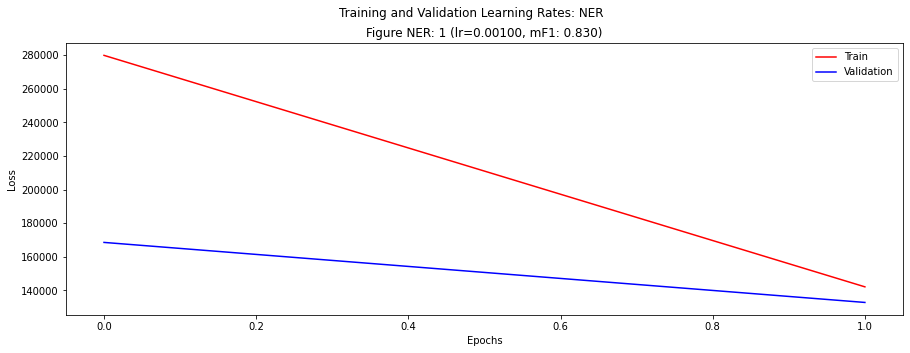

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2021-03-18 18:31:23,837[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-03-18 18:31:23,838[INFO]zensols.deeplearn.model.facade: training...
2021-03-18 18:31:23,839[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-03-18 18:31:23,840[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2021-03-18 18:31:23,869[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-03-18 18:31:23,898[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:0 for 20 epochs using learning rate 0.01
  0%|                                                                                            | 0/20 [00:00<?, ?it/s]2021-03-18 18:31:23,900[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:13229.191|va min:23099.772|va:23322.4

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 03/18/2021 18:31:23:901239
    ended: 03/18/2021 18:35:04:400160
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 20/20
    ave/min loss: 13229.19105/5226.00700
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 17/20
    ave/min loss: 23099.77188/2329.99934
    accuracy: 0.965 (49402/51217)
    micro: F1: 0.965, precision: 0.965, recall: 0.965
    macro: F1: 0.817, precision: 0.850, recall: 0.791
    weighted: F1: 0.964, precision: 0.963, recall: 0.965
  test:
    started: 03/18/2021 18:35:04:657160
    ended: 03/18/2021 18:35:05:842696
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.953 (44189/

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

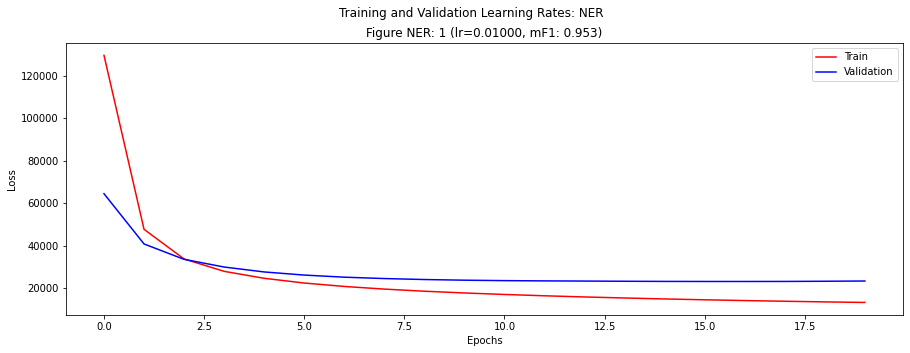

In [5]:
facade.learning_rate = 0.01
facade.epochs = 20
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-03-18 18:35:06,258[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-03-18 18:35:06,260[INFO]zensols.deeplearn.model.facade: training...
2021-03-18 18:35:06,261[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-03-18 18:35:06,261[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2021-03-18 18:35:06,290[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-03-18 18:35:06,318[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:0 for 25 epochs using learning rate 0.01
  0%|                                                                                            | 0/25 [00:00<?, ?it/s]2021-03-18 18:35:06,321[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:11535.914|va min:24081.633|va:24809.2

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 03/18/2021 18:35:06:321942
    ended: 03/18/2021 18:39:31:380480
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 25/25
    ave/min loss: 11535.91390/4058.91177
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 13/25
    ave/min loss: 24081.63332/2807.66302
    accuracy: 0.963 (49317/51217)
    micro: F1: 0.963, precision: 0.963, recall: 0.963
    macro: F1: 0.815, precision: 0.843, recall: 0.791
    weighted: F1: 0.962, precision: 0.961, recall: 0.963
  test:
    started: 03/18/2021 18:39:31:632127
    ended: 03/18/2021 18:39:32:830427
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.955 (44274/

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

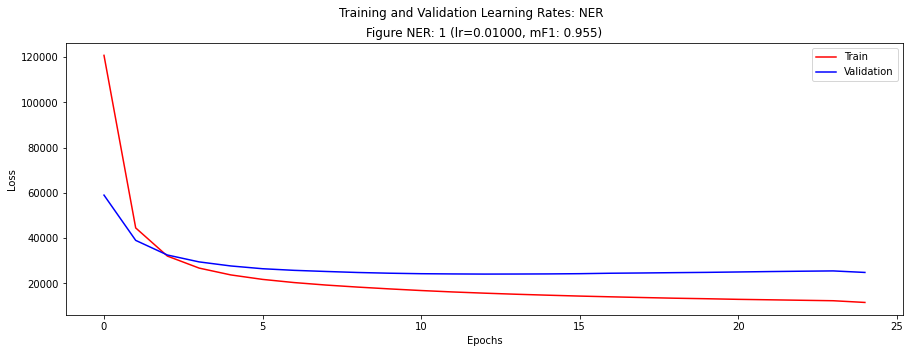

In [6]:
facade.learning_rate = 0.01
facade.epochs = 25
facade.embedding = 'glove_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-03-18 18:39:33,235[INFO]zensols.deeplearn.model.facade: clearing
2021-03-18 18:39:33,255[INFO]zensols.deeplearn.model.facade: creating new executor
2021-03-18 18:39:33,261[INFO]zensols.deepnlp.embed.domain: reusing already cached from use cuda: False, device: cpu
2021-03-18 18:39:33,273[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-03-18 18:39:33,273[INFO]zensols.deeplearn.model.facade: training...
2021-03-18 18:39:33,297[INFO]zensols.deeplearn.model.executor.status: batch iteration: cpu, limit: 9223372036854775807, caching: False, cached: 0
2021-03-18 18:39:40,447[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 7s
2021-03-18 18:39:40,447[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2021-03-18 18:39:40,452[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-03-18 18:39:40,481[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnl

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 03/18/2021 18:39:40:484346
    ended: 03/18/2021 18:44:16:048841
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 25/25
    ave/min loss: 12220.46752/4870.85565
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 15/25
    ave/min loss: 23481.61531/2810.99747
    accuracy: 0.964 (49358/51217)
    micro: F1: 0.964, precision: 0.964, recall: 0.964
    macro: F1: 0.818, precision: 0.843, recall: 0.798
    weighted: F1: 0.963, precision: 0.963, recall: 0.964
  test:
    started: 03/18/2021 18:44:17:776355
    ended: 03/18/2021 18:44:19:280672
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.950 (44038/

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

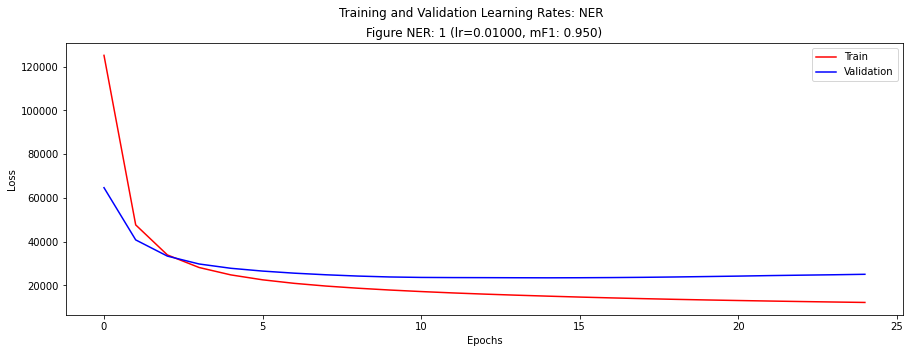

In [7]:
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-03-18 18:44:19,689[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-03-18 18:44:19,691[INFO]zensols.deeplearn.model.facade: training...
2021-03-18 18:44:19,692[INFO]zensols.deeplearn.model.executor.status: batch iteration: cpu, limit: 9223372036854775807, caching: False, cached: 0
2021-03-18 18:44:26,894[INFO]zensols.deeplearn.model.executor.status: loaded 136 batches in 7s
2021-03-18 18:44:26,894[INFO]zensols.deeplearn.model.executor.status: train/test sets: 110 26
2021-03-18 18:44:26,926[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-03-18 18:44:26,955[INFO]zensols.deeplearn.model.executor.status: training model <class 'zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF'> on cuda:0 for 60 epochs using learning rate 0.01
  0%|                                                   | 0/60 [00:00<?, ?it/s]2021-03-18 18:44:26,958[INFO]zensols.deeplearn.model.executor.status: watching update file ../targ

Name: NER: 1
Run index: 2
Learning rate: 0.01
  train:
    started: 03/18/2021 18:44:26:958656
    ended: 03/18/2021 18:55:08:798632
    batches: 110
    ave data points per batch: 127.6
    converged/epochs: 60/60
    ave/min loss: 9520.09319/3917.83255
    accuracy: nan (0/0)
    micro: F1: 0.000, precision: 0.000, recall: 0.000
    macro: F1: nan, precision: nan, recall: nan
    weighted: F1: 0.000, precision: 0.000, recall: 0.000
  validation:
    batches: 26
    ave data points per batch: 125.0
    converged/epochs: 17/60
    ave/min loss: 22164.03300/3077.35639
    accuracy: 0.966 (49473/51217)
    micro: F1: 0.966, precision: 0.966, recall: 0.966
    macro: F1: 0.830, precision: 0.863, recall: 0.802
    weighted: F1: 0.965, precision: 0.964, recall: 0.966
  test:
    started: 03/18/2021 18:55:10:774877
    ended: 03/18/2021 18:55:12:209699
    batches: 27
    ave data points per batch: 127.9
    converged/epochs: 1/1
    ave/min loss: 0.00000/0.00000
    accuracy: 0.953 (44201/4

zensols.deepnlp.layer.embrecurcrf.EmbeddedRecurrentCRF (2)

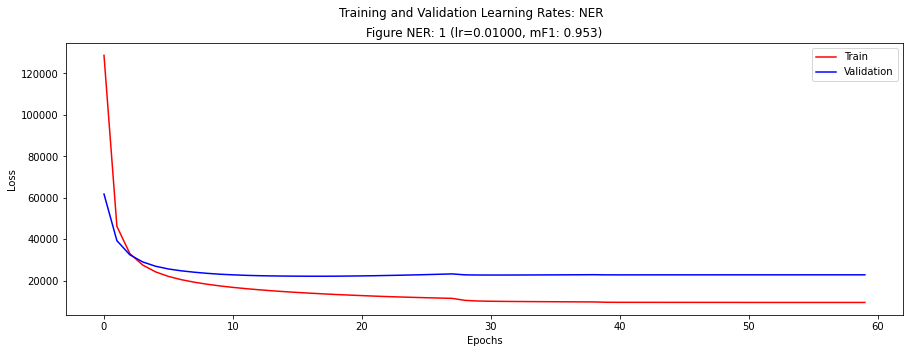

In [8]:
facade.epochs = 60
facade.embedding = 'bert_embedding'
facade.net_settings.add_attributes = ()
facade.train()
facade.test()
facade.write_result()
facade.plot_result()